In [ ]:
# importing utilities
import os
import sys
from datetime import datetime

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from IPython.display import Image, display

In [1]:
# importing data science libraries
import pandas as pd

In [2]:
!nvidia-smi

Sun Apr 22 22:19:53 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.48                 Driver Version: 390.48                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:26:00.0  On |                  N/A |
|  0%   41C    P5    14W / 200W |    620MiB /  8118MiB |      2%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
fraud_dataset = pd.read_csv('../data/PS_20174392719_1491204439457_log.csv')
print("There are ", len(fraud_dataset), " samples")

There are  6362620  samples


In [4]:
fraud_dataset.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
# number of anomalies vs. regular transactions
print(fraud_dataset.isFraud.value_counts())
print(fraud_dataset.isFlaggedFraud.value_counts())
print(fraud_dataset.describe())

0    6354407
1       8213
Name: isFraud, dtype: int64
0    6362604
1         16
Name: isFlaggedFraud, dtype: int64
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.58577

Text(0.5,1,'Distribution of isFraud attribute values')

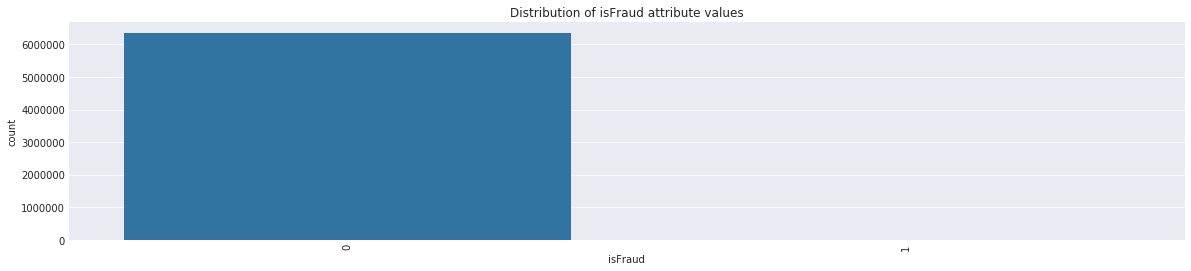

In [6]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(20)

# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset['isFraud'], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of isFraud attribute values')

Text(0.5,1,'Distribution of isFlaggedFraud attribute values')

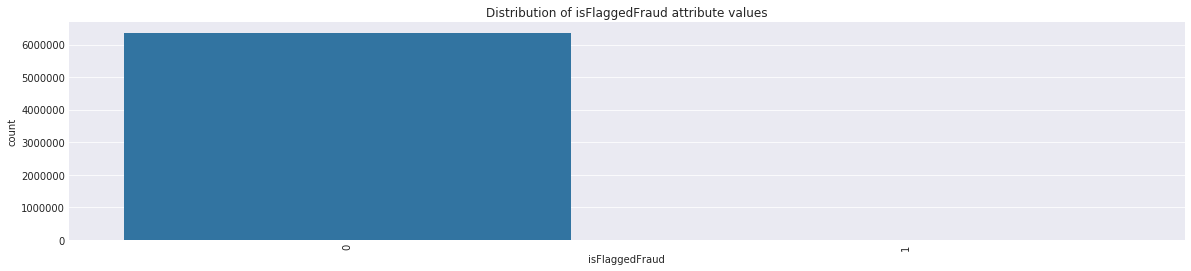

In [7]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(20)
                       
# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset['isFlaggedFraud'], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of isFlaggedFraud attribute values')

Text(0.5,1,'Positive Detections')

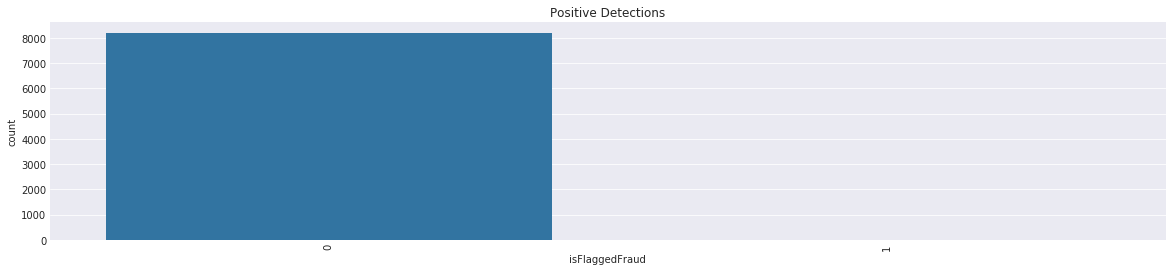

In [8]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(20)
                       
# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset[fraud_dataset["isFraud"] == 1]['isFlaggedFraud'], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Positive Detections')

Text(0.5,1,'False Negative Detections')

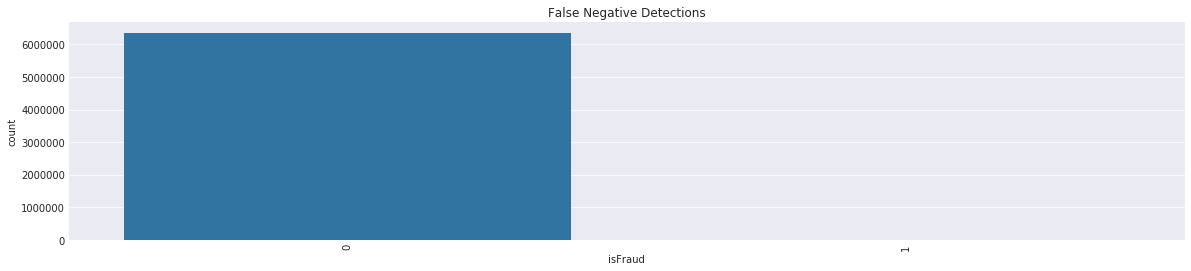

In [9]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(20)

# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset[fraud_dataset["isFlaggedFraud"] == 0]['isFraud'], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('False Negative Detections')

Text(0.5,1,'Distribution of type attribute values')

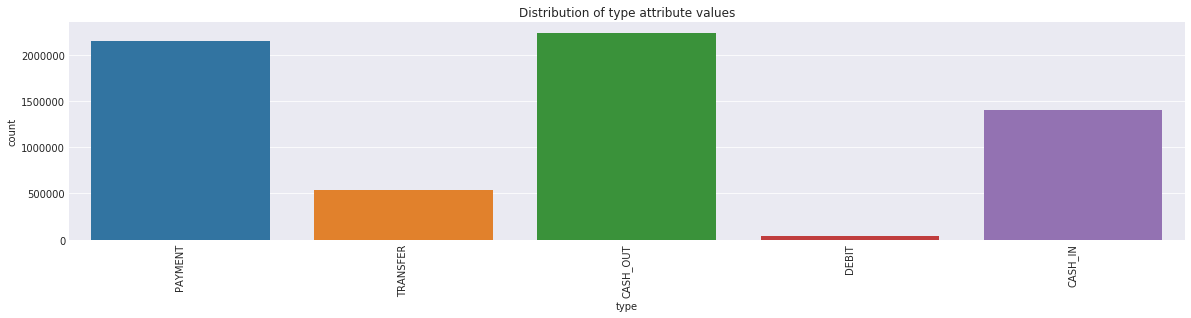

In [10]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(20)

# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset['type'], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of type attribute values')

Text(0.5,1,'Distribution of step attribute values')

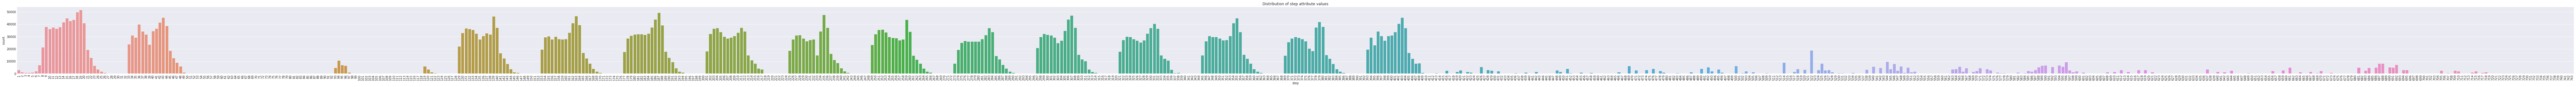

In [11]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(150)

# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset['step'], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of step attribute values')

Text(0.5,1,'Distribution of fraudulent step attribute values')

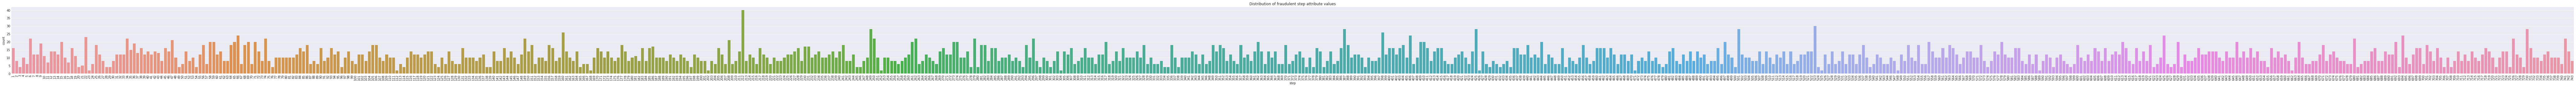

In [12]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(150)

# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset[fraud_dataset["isFraud"] == 1]["step"], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of fraudulent step attribute values')

Text(0.5,1,'Distribution of fradulent type attribute values')

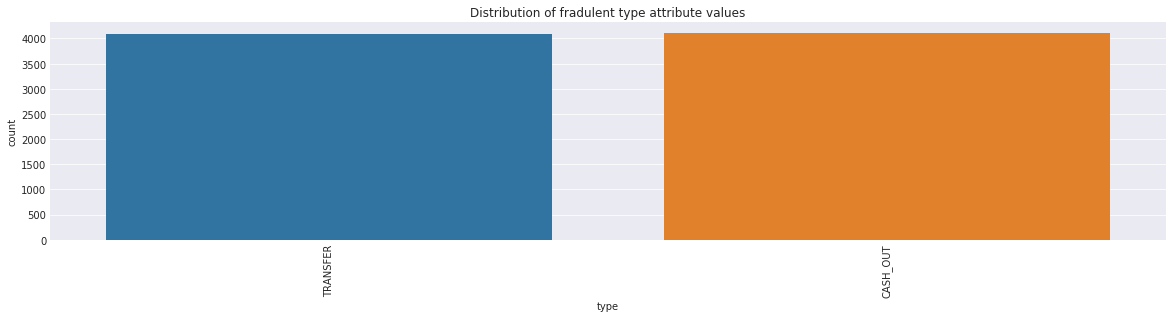

In [13]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(20)

# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset[fraud_dataset["isFraud"] == 1]["type"], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of fradulent type attribute values')

Text(0.5,1,'Distribution of ATO victims')

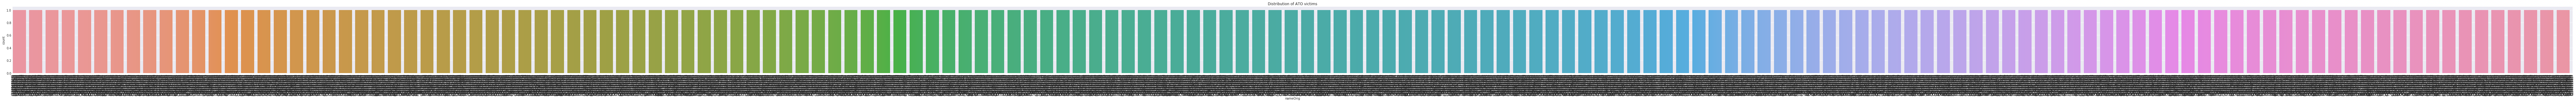

In [14]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(150)

# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset[fraud_dataset["isFraud"] == 1]["nameOrig"], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of ATO victims')

Text(0.5,1,'Distribution of ATO endpoints')

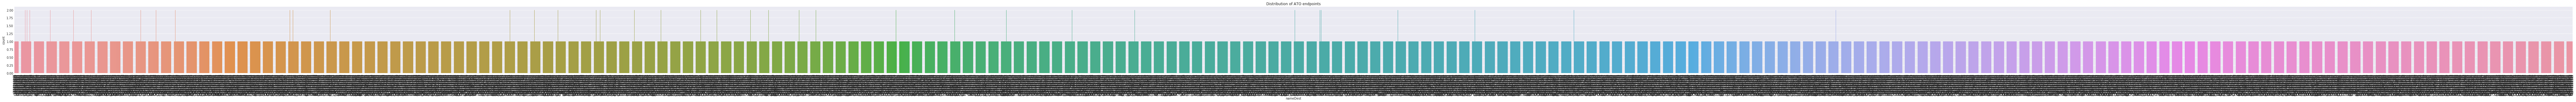

In [15]:
# prepare to plot posting key and general ledger account side by side
fig, ax = plt.subplots(1,1)
fig.set_figwidth(150)

# plot the distribution of the posting key attribute
g = sns.countplot(x=fraud_dataset[fraud_dataset["isFraud"] == 1]["nameDest"], ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Distribution of ATO endpoints')

In [16]:
columns=['dest_type', "dest_id"]
dest_split = fraud_dataset.nameDest.str.split('(\d+)').tolist()
# print(dest_split)
dest_split = pd.DataFrame([x[:2] for x in dest_split], columns=columns)
dest_split[columns[1]] = pd.to_numeric(dest_split[columns[1]])
# encode categorical attributes into a binary one-hot encoded representation
nameDest_categ_transformed = pd.concat([pd.get_dummies(dest_split[columns[0]]), dest_split[columns[1]]], axis = 1)
nameDest_categ_transformed = nameDest_categ_transformed.rename(columns = {"C":"C_dest", "M":"M_dest"})

In [17]:
print(dest_split.describe())
print(nameDest_categ_transformed.describe())
print(nameDest_categ_transformed.head(10))

            dest_id
count  6.362620e+06
mean   1.073432e+09
std    6.204927e+08
min    2.000000e+00
25%    5.360919e+08
50%    1.072209e+09
75%    1.611938e+09
max    2.147483e+09
             C_dest        M_dest       dest_id
count  6.362620e+06  6.362620e+06  6.362620e+06
mean   6.618539e-01  3.381461e-01  1.073432e+09
std    4.730786e-01  4.730786e-01  6.204927e+08
min    0.000000e+00  0.000000e+00  2.000000e+00
25%    0.000000e+00  0.000000e+00  5.360919e+08
50%    1.000000e+00  0.000000e+00  1.072209e+09
75%    1.000000e+00  1.000000e+00  1.611938e+09
max    1.000000e+00  1.000000e+00  2.147483e+09
   C_dest  M_dest     dest_id
0       0       1  1979787155
1       0       1  2044282225
2       1       0   553264065
3       1       0    38997010
4       0       1  1230701703
5       0       1   573487274
6       0       1   408069119
7       0       1   633326333
8       0       1  1176932104
9       1       0   195600860


In [18]:
columns=['orig_type', "orig_id"]
orig_split = fraud_dataset.nameOrig.str.split('(\d+)').tolist()
orig_split = pd.DataFrame([x[:2] for x in orig_split], columns=columns)
# print(orig_split.head(10))
orig_split[columns[1]] = pd.to_numeric(orig_split[columns[1]])
# encode categorical attributes into a binary one-hot encoded representation
orig_type = pd.get_dummies(orig_split[columns[0]])
# print(type(orig_split))
M_orig = orig_type.copy(deep=True)
orig_type = orig_type.rename(columns = {"C":"C_orig"})
M_orig = M_orig.rename(columns = {"C":"M_orig"})
M_orig[:] = 0
nameOrig_categ_transformed = pd.concat([orig_type, M_orig, orig_split[columns[1]]], axis = 1)

In [19]:
print(nameOrig_categ_transformed.describe())
# print(nameOrig_categ_transformed.describe())
# print(nameOrig_categ_transformed.head(10))

          C_orig     M_orig       orig_id
count  6362620.0  6362620.0  6.362620e+06
mean         1.0        0.0  1.073759e+09
std          0.0        0.0  6.200783e+08
min          1.0        0.0  1.338000e+03
25%          1.0        0.0  5.370177e+08
50%          1.0        0.0  1.073741e+09
75%          1.0        0.0  1.610814e+09
max          1.0        0.0  2.147484e+09


In [20]:
type_categ_transformed = pd.get_dummies(fraud_dataset["type"])

In [21]:
print(type_categ_transformed.head(10))
print(type_categ_transformed.describe())

   CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER
0        0         0      0        1         0
1        0         0      0        1         0
2        0         0      0        0         1
3        0         1      0        0         0
4        0         0      0        1         0
5        0         0      0        1         0
6        0         0      0        1         0
7        0         0      0        1         0
8        0         0      0        1         0
9        0         0      1        0         0
            CASH_IN      CASH_OUT         DEBIT       PAYMENT      TRANSFER
count  6.362620e+06  6.362620e+06  6.362620e+06  6.362620e+06  6.362620e+06
mean   2.199226e-01  3.516633e-01  6.511783e-03  3.381461e-01  8.375622e-02
std    4.141940e-01  4.774895e-01  8.043246e-02  4.730786e-01  2.770219e-01
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    0.000000e+00  0.0000

In [22]:
transformed_datatset = pd.concat([fraud_dataset, type_categ_transformed, nameOrig_categ_transformed, nameDest_categ_transformed], axis = 1)
print(transformed_datatset.head(10))
print(transformed_datatset.describe())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud     ...      CASH_OUT  \
0  M1979787155             0.0            0.00        0     ...             0   
1  M20442822

In [23]:
# remove unnecessary fields from the dataset and save the labels
print(fraud_dataset.shape)
print(transformed_datatset.shape)
drop_labels = ["type", "nameOrig", "nameDest", "isFlaggedFraud"]
for label in drop_labels:
    transformed_datatset.pop(label)
print(transformed_datatset.shape)

(6362620, 11)
(6362620, 22)
(6362620, 18)


In [24]:
print(transformed_datatset.head(10))

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64      170136.00       160296.36             0.0   
1     1   1864.28       21249.00        19384.72             0.0   
2     1    181.00         181.00            0.00             0.0   
3     1    181.00         181.00            0.00         21182.0   
4     1  11668.14       41554.00        29885.86             0.0   
5     1   7817.71       53860.00        46042.29             0.0   
6     1   7107.77      183195.00       176087.23             0.0   
7     1   7861.64      176087.23       168225.59             0.0   
8     1   4024.36        2671.00            0.00             0.0   
9     1   5337.77       41720.00        36382.23         41898.0   

   newbalanceDest  isFraud  CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER  \
0            0.00        0        0         0      0        1         0   
1            0.00        0        0         0      0        1         0   
2            0.00        1

In [25]:
print(transformed_datatset.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud       CASH_IN  \
count    6.362620e+06    6.362620e+06  6.362620e+06  6.362620e+06   
mean     1.100702e+06    1.224996e+06  1.290820e-03  2.199226e-01   
std      3.399180e+06    3.674129e+06  3.590480e-02  4.141940e-01   
min      0.000000e+00    0.000000e+00  0.000000e+00  0.000000e+00   
25%      0.000000e+00    0.000000e+00  0.0

In [26]:
labels = transformed_datatset["isFraud"].copy(deep=True)
print(labels.shape)

print(labels.head(10))

transformed_datatset.pop("isFraud")
print(transformed_datatset.shape)
print(transformed_datatset.head(10))

(6362620,)
0    0
1    0
2    1
3    1
4    0
5    0
6    0
7    0
8    0
9    0
Name: isFraud, dtype: int64
(6362620, 17)
   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64      170136.00       160296.36             0.0   
1     1   1864.28       21249.00        19384.72             0.0   
2     1    181.00         181.00            0.00             0.0   
3     1    181.00         181.00            0.00         21182.0   
4     1  11668.14       41554.00        29885.86             0.0   
5     1   7817.71       53860.00        46042.29             0.0   
6     1   7107.77      183195.00       176087.23             0.0   
7     1   7861.64      176087.23       168225.59             0.0   
8     1   4024.36        2671.00            0.00             0.0   
9     1   5337.77       41720.00        36382.23         41898.0   

   newbalanceDest  CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER  C_orig  \
0            0.00        0         0      0        1  

In [1]:
import tensorflow as tf

/opt/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

from keras import backend as K
K.set_session(sess)

Using TensorFlow backend.


In [6]:
fraud_dataset.nameOrig.value_counts

<bound method IndexOpsMixin.value_counts of 0          C1231006815
1          C1666544295
2          C1305486145
3           C840083671
4          C2048537720
5            C90045638
6           C154988899
7          C1912850431
8          C1265012928
9           C712410124
10         C1900366749
11          C249177573
12         C1648232591
13         C1716932897
14         C1026483832
15          C905080434
16          C761750706
17         C1237762639
18         C2033524545
19         C1670993182
20           C20804602
21         C1566511282
22         C1959239586
23          C504336483
24         C1984094095
25         C1043358826
26         C1671590089
27         C1053967012
28         C1632497828
29          C764826684
              ...     
6362590     C509686434
6362591     C919525792
6362592     C457476945
6362593     C369315575
6362594      C31496887
6362595    C1092829426
6362596    C1112979339
6362597    C1706094385
6362598    C1044665079
6362599    C1970706589
6362600      

In [3]:
import category_encoders as ce

In [44]:
# encoder = ce.BackwardDifferenceEncoder(cols=["type", nameOrig", "nameDest"])
encoder = ce.polynomial.PolynomialEncoder(cols=["type", "nameOrig", "nameDest"])

In [45]:
encoder = encoder.fit(fraud_dataset[0:100], verbose=1)

In [46]:
temp = encoder.transform(fraud_dataset[0:100])

In [47]:
print(temp.head(10))
print(temp.shape)

   col_type_0  col_type_1  col_type_2  col_type_3  col_nameOrig_0  \
0         1.0   -0.670820         0.5   -0.223607             1.0   
1         1.0   -0.670820         0.5   -0.223607             1.0   
2         1.0   -0.223607        -0.5    0.670820             1.0   
3         1.0    0.223607        -0.5   -0.670820             1.0   
4         1.0   -0.670820         0.5   -0.223607             1.0   
5         1.0   -0.670820         0.5   -0.223607             1.0   
6         1.0   -0.670820         0.5   -0.223607             1.0   
7         1.0   -0.670820         0.5   -0.223607             1.0   
8         1.0   -0.670820         0.5   -0.223607             1.0   
9         1.0    0.670820         0.5    0.223607             1.0   

   col_nameOrig_1  col_nameOrig_2  col_nameOrig_3  col_nameOrig_4  \
0       -0.171482        0.216998       -0.249164        0.271442   
1       -0.168017        0.203846       -0.218963        0.216605   
2       -0.164553        0.190963

In [ ]:
temp.to_csv("../data/allbackwarddiffds.csv", sep=',')

In [27]:
print(temp.describe())

       col_nameOrig_0  col_nameOrig_1  col_nameOrig_2  col_nameOrig_3  \
count           100.0    1.000000e+02    1.000000e+02    1.000000e+02   
mean              1.0    6.383782e-18   -7.771561e-18    2.498002e-18   
std               0.0    1.005038e-01    1.005038e-01    1.005038e-01   
min               1.0   -1.714816e-01   -1.117866e-01   -2.491645e-01   
25%               1.0   -8.574080e-02   -9.085180e-02   -8.929788e-02   
50%               1.0    0.000000e+00   -2.791311e-02    3.035766e-17   
75%               1.0    8.574080e-02    7.689524e-02    8.929788e-02   
max               1.0    1.714816e-01    2.169976e-01    2.491645e-01   

       col_nameOrig_4  col_nameOrig_5  col_nameOrig_6  col_nameOrig_7  \
count    1.000000e+02    1.000000e+02    1.000000e+02    1.000000e+02   
mean     1.110223e-18   -7.216450e-18    4.996004e-18   -1.276756e-17   
std      1.005038e-01    1.005038e-01    1.005038e-01    1.005038e-01   
min     -1.286225e-01   -2.854431e-01   -1.499312e

In [38]:
print(len(fraud_dataset.nameOrig.unique()))

6353307


In [39]:
print(len(fraud_dataset.nameDest.unique()))

2722362


In [1]:
from keras.utils import to_categorical

/opt/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
encoded = to_categorical(fraud_dataset[0:10])
print(encoded)

ValueError: invalid literal for int() with base 10: 'PAYMENT'

In [3]:
# remove unnecessary fields from the dataset and save the labels
nonames = fraud_dataset.copy()
print(nonames.shape)
print(nonames.shape)
drop_labels = ["nameOrig", "nameDest", "isFlaggedFraud"]
for label in drop_labels:
    nonames.pop(label)
print(nonames.shape)
print(nonames.head(10))
print(nonames.describe())

(6362620, 11)
(6362620, 11)
(6362620, 8)
   step      type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64      170136.00       160296.36             0.0   
1     1   PAYMENT   1864.28       21249.00        19384.72             0.0   
2     1  TRANSFER    181.00         181.00            0.00             0.0   
3     1  CASH_OUT    181.00         181.00            0.00         21182.0   
4     1   PAYMENT  11668.14       41554.00        29885.86             0.0   
5     1   PAYMENT   7817.71       53860.00        46042.29             0.0   
6     1   PAYMENT   7107.77      183195.00       176087.23             0.0   
7     1   PAYMENT   7861.64      176087.23       168225.59             0.0   
8     1   PAYMENT   4024.36        2671.00            0.00             0.0   
9     1     DEBIT   5337.77       41720.00        36382.23         41898.0   

   newbalanceDest  isFraud  
0            0.00        0  
1            0.00        0  
2            

In [6]:
nonames_transformed = pd.get_dummies(nonames["type"])
nonames.pop("type")
nonames_datatset = pd.concat([nonames, nonames_transformed], axis = 1)
print(nonames_datatset.head(10))
print(nonames_datatset.describe())

KeyError: 'type'

In [7]:
nonames_datatset.to_csv("../data/nonames.csv", index=False)